<a href="https://colab.research.google.com/github/jashitgoliAP21110010921/AP21110010921-CSE336L/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:
x = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])
mean = np.mean(x, axis=0)
print("mean:",mean)


mean: [5.2 2.6]


In [17]:
cov_matrix = np.cov(x,rowvar=False)
print("Covarinace Matrix: ","\n",cov_matrix)

Covarinace Matrix:  
 [[8.2 1.6]
 [1.6 5.8]]


In [23]:
eigenvalues,eigenvectors= np.linalg.eig(cov_matrix)
print("eigenvalues:",eigenvalues)
print("eigenvectors:","\n",eigenvectors)

eigenvalues: [9. 5.]
eigenvectors: 
 [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


In [24]:
j=np.subtract(x,mean)
j

array([[-3.2, -1.6],
       [-2.2,  1.4],
       [-0.2, -2.6],
       [ 1.8,  3.4],
       [ 3.8, -0.6]])

In [29]:
h=np.matmul(j,eigenvectors)
a=np.around(h,decimals=3)
print("principle component : ","\n",a)

principle component :  
 [[-3.578 -0.   ]
 [-1.342  2.236]
 [-1.342 -2.236]
 [ 3.13   2.236]
 [ 3.13  -2.236]]


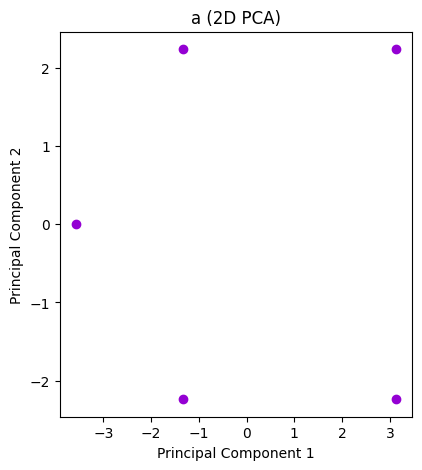

In [36]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.scatter(a[:, 0], a[:, 1], color='darkviolet')
plt.title('a (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

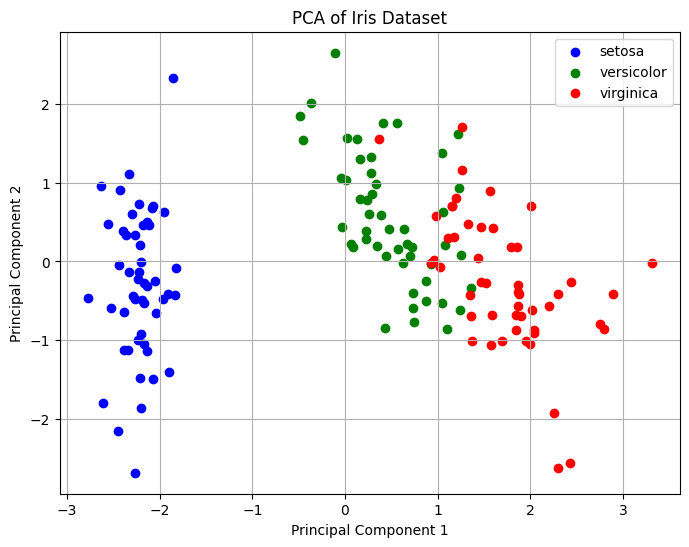

In [38]:

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
cov_matrix = np.cov(X_std, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
top_eigenvectors = eigenvectors[:, :2]
transformed_data = np.dot(X_std, top_eigenvectors)
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']

for target, color in zip(np.unique(y), colors):
    indices = np.where(y == target)
    plt.scatter(transformed_data[indices, 0], transformed_data[indices, 1], c=color, label=iris.target_names[target])

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()